<a href="https://colab.research.google.com/github/kalinharikumar/singapore_real_estate_price_prediction/blob/main/Singapore_Resale_Flat_Prices_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzip file

!unzip /content/ResaleFlatPrices.zip


Archive:  /content/ResaleFlatPrices.zip
  inflating: Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv  
  inflating: Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv  
  inflating: Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv  
  inflating: Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv  
  inflating: Resale flat prices based on registration date from Jan-2017 onwards.csv  


In [ ]:
# read concat all csv file

import pandas as pd
import glob
import os

# Assuming the CSV files are in the 'ResaleFlatPrices' directory after unzipping
csv_files = glob.glob('/content/*.csv')

# Create an empty list to store the dataframes
dfs = []

# Loop through each CSV file and read it into a dataframe
for file in csv_files:
    try:
        df = pd.read_csv(file)
        print(f"shapeof {file} is {df.shape}")
        dfs.append(df)
    except pd.errors.EmptyDataError:
        print(f"Warning: Skipping empty file {file}")
    except pd.errors.ParserError:
        print(f"Warning: Skipping file with parsing errors {file}")

# Concatenate all dataframes into a single dataframe
if dfs:
  combined_df = pd.concat(dfs, ignore_index=True)
  print(f"shapeof combined df is {combined_df.shape}")
else:
  print("No valid CSV files found or all files encountered errors.")


shapeof /content/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv is (37153, 11)
shapeof /content/Resale flat prices based on registration date from Jan-2017 onwards.csv is (206029, 11)
shapeof /content/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv is (369651, 10)
shapeof /content/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv is (52203, 10)
shapeof /content/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv is (287196, 10)
shapeof combined df is (952232, 11)


In [ ]:
# save combined df
combined_df.to_csv('/content/drive/MyDrive/capstone/price_prediction/combined_df.csv', index=False)

In [ ]:
# read csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/capstone/price_prediction/combined_df.csv')
df.columns

<ipython-input-27-d32664da195e>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/capstone/price_prediction/combined_df.csv')


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [ ]:
#check duplicates
df.duplicated().sum()

np.int64(1912)

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

df.duplicated().sum()

np.int64(0)

In [ ]:
# check null values
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,707463


In [ ]:
# Feature Engineering - 1
# split month column records to two columns by spliting '-' new columns as year and month

# Assuming 'month' column exists and is in 'YYYY-MM' format
df[['year', 'month']] = df['month'].str.split('-', expand=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015
1,01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015
2,01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,2015
3,01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,2015
4,01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,2015


In [ ]:
# Fill NaN values in 'remaining_lease'

df['remaining_lease'] = df['remaining_lease'].fillna(99 - (df['year'].astype(int) - df['lease_commence_date'].astype(int)))
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


In [ ]:
# drop year since its not a relevent feature
# df = df.drop('year', axis=1)
# df.columns

In [ ]:
df.nunique()

,0
month,12
town,27
flat_type,8
block,2743
street_name,592
storey_range,25
floor_area_sqm,220
flat_model,34
lease_commence_date,56
remaining_lease,787


In [ ]:
# looks df['block'] has values like 335B 1A ...
for value in df['block'].unique():
    try:
        int(value)
    except ValueError:
        print(f"Value '{value}' in 'block' column cannot be converted to an integer.")


Value '596B' in 'block' column cannot be converted to an integer.
Value '253A' in 'block' column cannot be converted to an integer.
Value '315B' in 'block' column cannot be converted to an integer.
Value '700C' in 'block' column cannot be converted to an integer.
Value '221B' in 'block' column cannot be converted to an integer.
Value '219A' in 'block' column cannot be converted to an integer.
Value '10D' in 'block' column cannot be converted to an integer.
Value '291B' in 'block' column cannot be converted to an integer.
Value '288D' in 'block' column cannot be converted to an integer.
Value '290D' in 'block' column cannot be converted to an integer.
Value '291D' in 'block' column cannot be converted to an integer.
Value '291A' in 'block' column cannot be converted to an integer.
Value '26D' in 'block' column cannot be converted to an integer.
Value '26C' in 'block' column cannot be converted to an integer.
Value '106A' in 'block' column cannot be converted to an integer.
Value '112B' 

In [ ]:
# Feature Engineering - 2
# Spliting 'block' column into 'Block_number' and 'Block_code'
# into numeric and alphabetic using regex
df[['block_number', 'block_code']] = df['block'].str.extract(r'(\d+)([A-Za-z]*)')
# Replace empty strings in 'letter' with 'OTHER'
df['block_code'] = df['block_code'].replace('', 'OTHER')
df = df.drop('block', axis = 1)
df


,month,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,block_number,block_code
0,01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015,174,OTHER
1,01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015,541,OTHER
2,01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,2015,163,OTHER
3,01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,2015,446,OTHER
4,01,ANG MO KIO,3 ROOM,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,2015,557,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952227,12,YISHUN,EXECUTIVE,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,87,456000.0,1999,611,OTHER
952228,12,YISHUN,EXECUTIVE,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,88,408000.0,1999,324,OTHER
952229,12,YISHUN,EXECUTIVE,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,88,469000.0,1999,392,OTHER
952230,12,YISHUN,EXECUTIVE,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,88,440000.0,1999,356,OTHER


In [ ]:
df['block_code'].unique()

array(['OTHER', 'B', 'A', 'C', 'D', 'F', 'E', 'L', 'G', 'J', 'H', 'M'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950320 entries, 0 to 952231
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                950320 non-null  object 
 1   town                 950320 non-null  object 
 2   flat_type            950320 non-null  object 
 3   street_name          950320 non-null  object 
 4   storey_range         950320 non-null  object 
 5   floor_area_sqm       950320 non-null  float64
 6   flat_model           950320 non-null  object 
 7   lease_commence_date  950320 non-null  int64  
 8   remaining_lease      950320 non-null  object 
 9   resale_price         950320 non-null  float64
 10  year                 950320 non-null  object 
 11  block_number         950320 non-null  object 
 12  block_code           950320 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 101.5+ MB


In [ ]:
df['remaining_lease'].unique()

array(['70', '65', '64', '63', '62', '69', '60', '61', '86', '77', '80',
       '90', '87', '66', '58', '94', '71', '68', '84', '73', '79', '76',
       '72', '82', '74', '67', '88', '81', '89', '53', '54', '55', '57',
       '93', '83', '85', '92', '91', '59', '95', '52', '51', '56', '75',
       '96', '78', '50', '97', '49', '48', '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', 

In [ ]:
# Split, select first element, and convert to integers with error handling
for index, value in df['remaining_lease'].items():
    if isinstance(value, (int)):  # Skip if value is already numeric
        continue
    try:
        df.loc[index, 'remaining_lease'] = int(value.split(' ')[0])  # Convert and update in place
    except (ValueError, AttributeError) as e:  # Catch ValueError and AttributeError
        print(f"Error converting value at index {index}: {value}, Error: {e}")

In [ ]:
df['remaining_lease'].unique()

array([70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58, 94, 71,
       68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55, 57, 93,
       83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49, 48, 47,
       46, 45, 44, 43, 42, 41, 40, 98, 101, 100, 99], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950320 entries, 0 to 952231
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                950320 non-null  object 
 1   town                 950320 non-null  object 
 2   flat_type            950320 non-null  object 
 3   street_name          950320 non-null  object 
 4   storey_range         950320 non-null  object 
 5   floor_area_sqm       950320 non-null  float64
 6   flat_model           950320 non-null  object 
 7   lease_commence_date  950320 non-null  int64  
 8   remaining_lease      950320 non-null  object 
 9   resale_price         950320 non-null  float64
 10  year                 950320 non-null  object 
 11  block_number         950320 non-null  object 
 12  block_code           950320 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 133.8+ MB


In [ ]:
# changing columns to required data type
df['month'] = df['month'].astype('int64')
#df['lease_commence_date'] = df['lease_commence_date'].astype('int64')
df['remaining_lease'] = df['remaining_lease'].astype('int64')
df['block_number'] = df['block_number'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950320 entries, 0 to 952231
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                950320 non-null  int64  
 1   town                 950320 non-null  object 
 2   flat_type            950320 non-null  object 
 3   street_name          950320 non-null  object 
 4   storey_range         950320 non-null  object 
 5   floor_area_sqm       950320 non-null  float64
 6   flat_model           950320 non-null  object 
 7   lease_commence_date  950320 non-null  int64  
 8   remaining_lease      950320 non-null  int64  
 9   resale_price         950320 non-null  float64
 10  year                 950320 non-null  object 
 11  block_number         950320 non-null  int64  
 12  block_code           950320 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 133.8+ MB


In [ ]:
df.nunique()

,0
month,12
town,27
flat_type,8
street_name,592
storey_range,25
floor_area_sqm,220
flat_model,34
lease_commence_date,56
remaining_lease,62
resale_price,9909


In [ ]:
df.to_csv('/content/drive/MyDrive/capstone/price_prediction/final_df.csv', index=False)


In [ ]:
categorical_cols = ['town', 'flat_type', 'street_name', 'storey_range', 'flat_model', 'block_code']
# Create dictionaries to store mappings for each column
encoding_maps = {}

# Loop through the specified categorical columns
for col in categorical_cols:
    # Get the unique values in the column
    unique_values = df[col].unique()

    # Create a mapping dictionary
    encoding_map = {value: i for i, value in enumerate(unique_values)}
    encoding_maps[col] = encoding_map
    # Map the values in the column to their encoded values
    df[col] = df[col].map(encoding_map)

# Save the mapping dictionaries as pickle files
for col, encoding_map in encoding_maps.items():
    with open(f'/content/drive/MyDrive/capstone/price_prediction/label_encodings/encoding_map_{col}.pkl', 'wb') as file:
        pickle.dump(encoding_map, file)


In [ ]:
import pickle
# Load the encoding map for 'block_code'
with open('/content/drive/MyDrive/capstone/price_prediction/label_encodings/encoding_map_block_code.pkl', 'rb') as file:
    encoding_map_block_code = pickle.load(file)

# Now you can use encoding_map_block_code
encoding_map_block_code


{'OTHER': 0,
 'B': 1,
 'A': 2,
 'C': 3,
 'D': 4,
 'F': 5,
 'E': 6,
 'L': 7,
 'G': 8,
 'J': 9,
 'H': 10,
 'M': 11}

In [ ]:
df.head()

,month,town,flat_type,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,block_number,block_code
0,1,0,0,0,0,60.0,0,1986,70,255000.0,2015,174,0
1,1,0,0,1,1,68.0,1,1981,65,275000.0,2015,541,0
2,1,0,0,0,1,69.0,1,1980,64,285000.0,2015,163,0
3,1,0,0,1,1,68.0,1,1979,63,290000.0,2015,446,0
4,1,0,0,1,0,68.0,1,1980,64,290000.0,2015,557,0


In [ ]:
df.to_csv('/content/drive/MyDrive/capstone/price_prediction/label_encoded.csv', index=False)


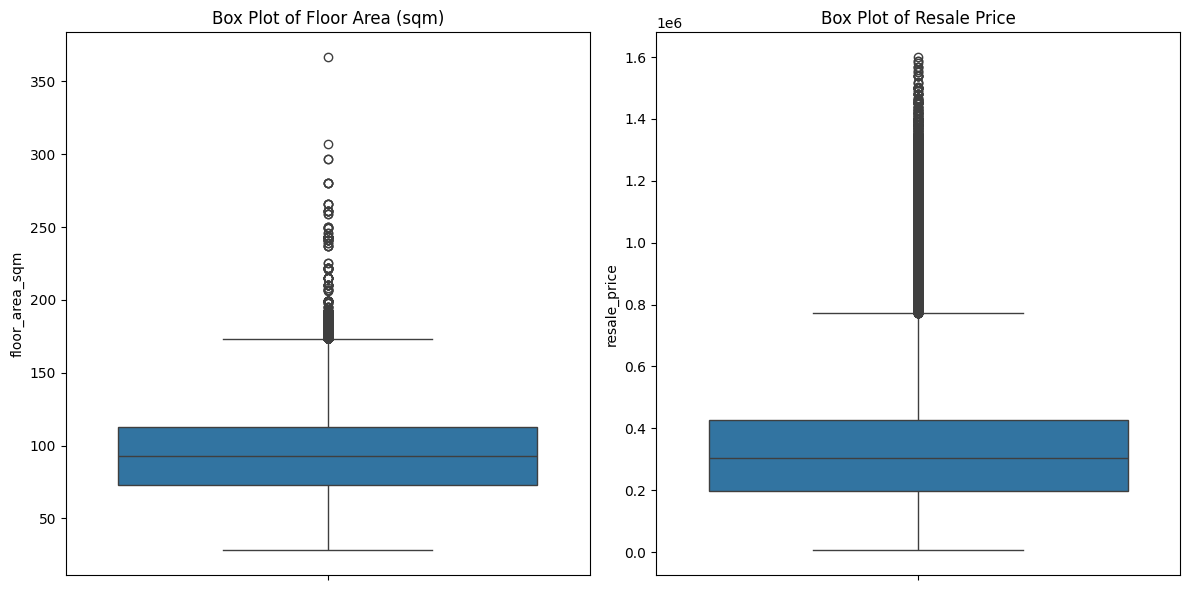

In [ ]:
# outlier detection for floor_area_sqm, resale_price with box plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for 'floor_area_sqm' and 'resale_price'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['floor_area_sqm'])
plt.title('Box Plot of Floor Area (sqm)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['resale_price'])
plt.title('Box Plot of Resale Price')

plt.tight_layout()
plt.show()


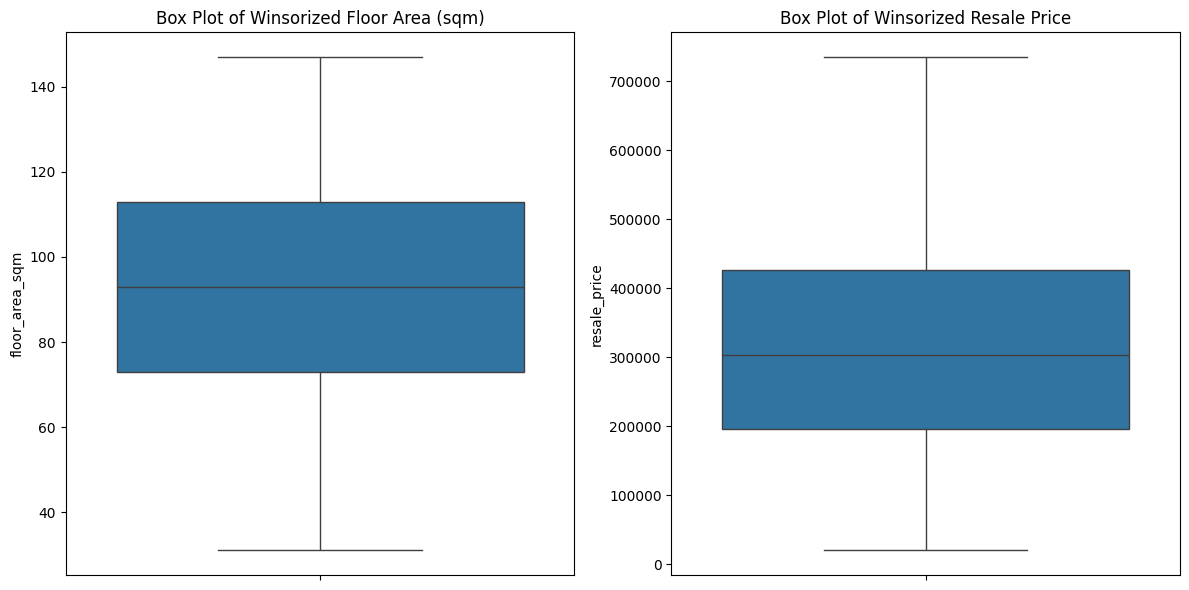

In [ ]:
# outlier remove with winzore method

import pandas as pd
from scipy.stats.mstats import winsorize

# Define the limits for winsorizing
limits = [0.001, 0.03]  # Winsorize top and bottom

df['floor_area_sqm'] = winsorize(df['floor_area_sqm'], limits=limits)

df['resale_price'] = winsorize(df['resale_price'], limits=limits)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['floor_area_sqm'])
plt.title('Box Plot of Winsorized Floor Area (sqm)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['resale_price'])
plt.title('Box Plot of Winsorized Resale Price')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/capstone/price_prediction/label_encoded.csv')


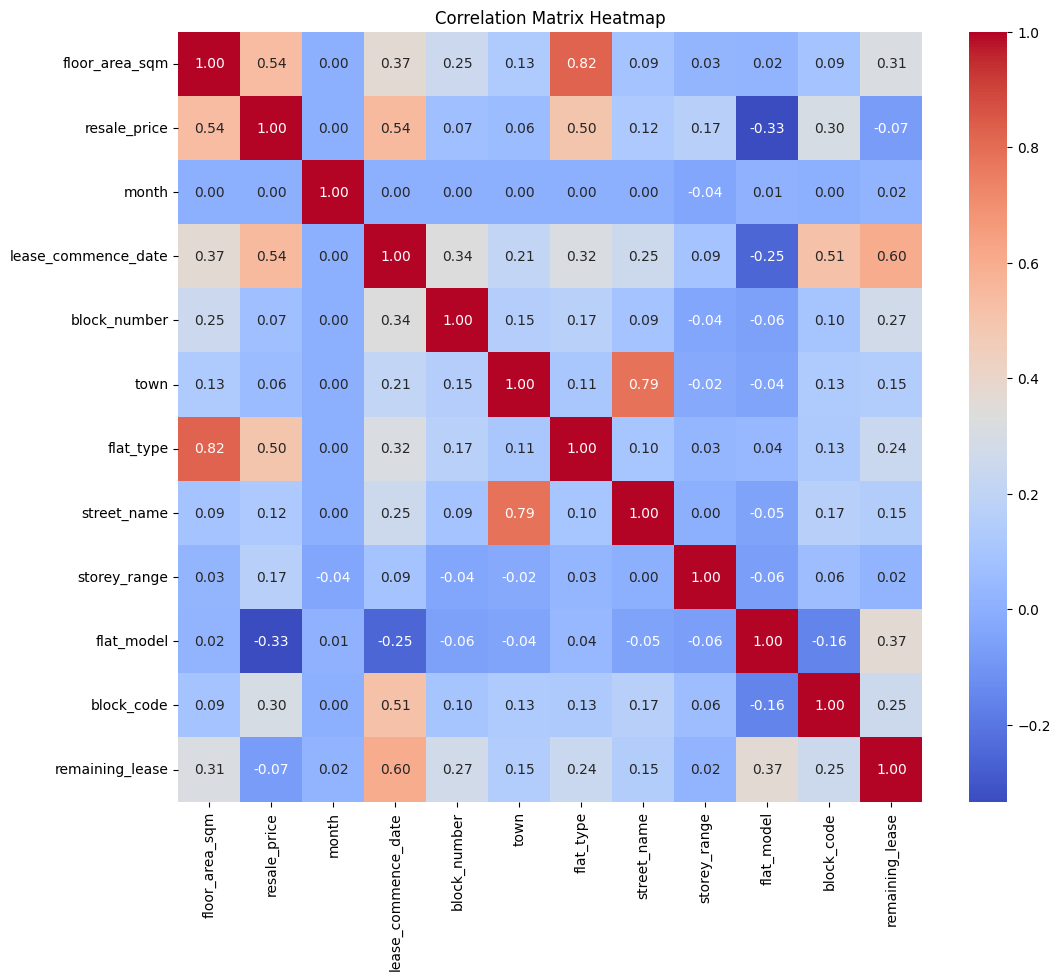

In [ ]:
# heat map to check similareirty
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for similarity analysis
features_for_heatmap = ['floor_area_sqm', 'resale_price', 'month', 'lease_commence_date', 'block_number', 'town', 'flat_type', 'street_name', 'storey_range', 'flat_model', 'block_code', 'remaining_lease']
similarity_df = df[features_for_heatmap]


# Calculate the correlation matrix
correlation_matrix = similarity_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'year', 'block_number',
       'block_code'],
      dtype='object')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X = df[['month', 'town', 'flat_type', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
        'block_number',  'block_code', 'remaining_lease']]
y = df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# xg boost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1177619207.8524609
Root Mean Squared Error: 34316.4568079582
R-squared: 0.9627703179050088


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=6,
                          loss_function='RMSE',
                          eval_metric='RMSE',
                          random_seed=42)


# Train the model
model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=100,
          use_best_model=True,
          plot=True)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 156041.2340841	test: 155787.6206576	best: 155787.6206576 (0)	total: 135ms	remaining: 2m 14s
100:	learn: 54631.0502870	test: 54510.7329096	best: 54510.7329096 (100)	total: 11.3s	remaining: 1m 40s
200:	learn: 46822.1885524	test: 46709.0941017	best: 46709.0941017 (200)	total: 22.6s	remaining: 1m 29s
300:	learn: 42127.3367612	test: 42047.1729007	best: 42047.1729007 (300)	total: 32.1s	remaining: 1m 14s
400:	learn: 38692.1054197	test: 38622.7179531	best: 38622.7179531 (400)	total: 43s	remaining: 1m 4s
500:	learn: 36413.3674747	test: 36369.2395150	best: 36369.2395150 (500)	total: 54.4s	remaining: 54.2s
600:	learn: 34651.7623087	test: 34627.9299085	best: 34627.9299085 (600)	total: 1m 6s	remaining: 43.8s
700:	learn: 33390.2908307	test: 33383.3988971	best: 33383.3988971 (700)	total: 1m 17s	remaining: 33s
800:	learn: 32277.8845127	test: 32292.8862650	best: 32292.8862650 (800)	total: 1m 27s	remaining: 21.7s
900:	learn: 31375.1056753	test: 31412.4400788	best: 31412.4400788 (900)	total: 1m

In [ ]:
!pip install --upgrade dask distributed --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 324.3 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.12.1
    Uninstalling dask-2024.12.1:
      Successfully uninstalled dask-2024.12.1
  Attempting uninstall: distributed
    Found existing installation: distributed 2024.12.1
    Uninstalling distributed-2024.12.1:
      Successfully uninstalled distributed-2024.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.21 requires dask==2024.12.1, but you have dask 2025.4.1 which is incompatible.
rapids-dask-dependency 25.2.0 requires dask==2024.12.1, but you have dask 2025.4.1 which is incompatible.
rapids-dask-dependency 25.2.0 requires distributed==2024.12.1, but you have distributed 2025.4.1 which is incompatible.


In [ ]:
import lightgbm as lgb

# Create and train the LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 665224, number of used features: 10
[LightGBM] [Info] Start training from score 325281.754391
Mean Squared Error: 1808523367.8065345
Root Mean Squared Error: 42526.737093345575
R-squared: 0.934952237764717


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 591437227.7140507
Root Mean Squared Error: 24319.482472167263
R-squared: 0.9813020882980573


In [ ]:
# save model file as joblib

import joblib

joblib.dump(rf_model, '/content/drive/MyDrive/capstone/price_prediction/rf_model.joblib')


['/content/drive/MyDrive/capstone/price_prediction/rf_model.joblib']

In [ ]:
# prompt: load /content/drive/MyDrive/capstone/price_prediction/rf_model.joblib

loaded_model = joblib.load('/content/drive/MyDrive/capstone/price_prediction/rf_model.joblib')


In [ ]:
# Saving the trained model
import pickle
with open('/content/drive/MyDrive/capstone/price_prediction/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [ ]:
df['resale_price'].describe()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:3764: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  r = func(a, **kwargs)


,resale_price
count,950320.000000
mean,325359.154169
std,166906.933410
min,20000.000000
25%,196000.000000
50%,303000.000000
75%,426800.000000
max,735000.000000


In [ ]:
# so min - 20000 max - 735000
# 464342950

In [4]:
%%writefile run.py
import streamlit as st
import joblib
import pickle

# -------------------- LOAD MODEL & ENCODERS --------------------
model = joblib.load('rf_model.joblib')

CATEGORICAL_COLS = ['town', 'flat_type', 'storey_range', 'flat_model', 'block_code']
FEATURES = ['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
            'flat_model', 'lease_commence_date', 'block_number', 'block_code', 'remaining_lease']

encoders = {}
for col in CATEGORICAL_COLS:
    with open(f"/content/drive/MyDrive/capstone/price_prediction/label_encodings/encoding_map_{col}.pkl", "rb") as f:
        encoders[col] = pickle.load(f)

# -------------------- MAIN PAGE --------------------
st.title("🏠 Singapore Real Estate Price Predictor")
st.markdown("Enter the details of the HDB property to estimate its resale price.")

input_data = {}

# ---- 1. Flat Characteristics ----
st.markdown("### 🏢 Flat Information")
input_data['flat_type'] = encoders['flat_type'][st.selectbox("Flat Type", list(encoders['flat_type'].keys()))]
input_data['flat_model'] = encoders['flat_model'][st.selectbox("Flat Model", list(encoders['flat_model'].keys()))]
input_data['storey_range'] = encoders['storey_range'][st.selectbox("Storey Range", list(encoders['storey_range'].keys()))]

# ---- 2. Size ----
st.markdown("### 📐 Size & Layout")
input_data['floor_area_sqm'] = st.number_input("Floor Area (sqm)", min_value=10.0, max_value=300.0, value=70.0)

# ---- 3. Lease ----
st.markdown("### 📜 Lease Details")
input_data['lease_commence_date'] = st.number_input("Lease Commencement Year", min_value=1960, max_value=2030, value=2000)
input_data['remaining_lease'] = st.number_input("Remaining Lease (Years)", min_value=0, max_value=99, value=60)
input_data['month'] = st.number_input("Resale Month (1–12)", min_value=1, max_value=12, value=1)

# ---- 4. Location ----
st.markdown("### 📍 Location Details")
input_data['town'] = encoders['town'][st.selectbox("Town", list(encoders['town'].keys()))]
input_data['block_number'] = st.text_input("Block Number (e.g., '123', 'B123')")
input_data['block_code'] = encoders['block_code'][st.selectbox("Block Code", list(encoders['block_code'].keys()))]

# ---- Predict Button ----
if st.button("📊 Analyse Price"):
    try:
        X = [[input_data[feature] for feature in FEATURES]]
        prediction = model.predict(X)[0]
        st.success(f"💰 Estimated Resale Price: **SGD {round(prediction, 2):,}**")
    except Exception as e:
        st.error(f"Prediction failed: {e}")



Overwriting run.py


In [2]:
!cp '/content/drive/MyDrive/capstone/price_prediction/rf_model.joblib' '/content/'

In [3]:
!pip install streamlit
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.0 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 2s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [5]:
# run streamlit
!streamlit run run.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.106.62.247
⠙⠹your url is: https://sweet-dots-notice.loca.lt
